In [22]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score,  mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sn
from cca_zoo import linear as czoo
from cca_zoo import model_selection as modSelect


In [158]:
numSamples = 204
#Importing characteristic parameter data
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
df = pd.read_excel(base_dir+'\Project\HOA_PD_SRM_Output_StatsTable__05-Jun-2024.xlsx')

In [159]:
input = df.iloc[:, 43:47]
output = df.iloc[:, 79:87]

print(input, output)

     Gains_Cz_1  Gains_Cz_2    Gains_Cz_3  Gains_Cz_4
0      8.868028    0.004679  7.253581e-10    0.120726
1      5.472525    0.005360  3.067270e-08    0.117504
2      3.572469    0.000806  4.902102e-03    0.110458
3      5.825121    0.008002  8.100462e-08    0.125151
4      4.953459    0.002775  2.433101e-08    0.113535
..          ...         ...           ...         ...
199    5.147386    0.005870  1.593746e-02    0.124509
200    3.827869    0.006816  4.431324e-11    0.113573
201    7.105425    0.011162  8.247740e-09    0.136039
202    4.153222    0.007191  2.399530e-10    0.125558
203    3.730875    0.007418  5.544349e-09    0.114774

[204 rows x 4 columns]      Gains_Ag_TotalDual_CoM_1  Gains_Ag_TotalDual_CoM_2  \
0                    8.705701                  0.003416   
1                    5.334891                  0.007539   
2                    3.284545                  0.012409   
3                    4.594461                  0.003330   
4                    4.585228    

In [160]:
#Z-score normalization
input = StandardScaler().fit_transform(input)
output = StandardScaler().fit_transform(output)

input = pd.DataFrame(input)
output = pd.DataFrame(output)

In [161]:
#Input correlation plot
df = input
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3
0,1.000000,0.345936,0.091986,0.173454
1,0.345936,1.000000,0.200407,0.342032
2,0.091986,0.200407,1.000000,0.038550
3,0.173454,0.342032,0.038550,1.000000


In [6]:
#output correlation plot
df = output
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7
0,1.000000,0.322261,-0.013841,-0.016235,0.551562,-0.039982,-0.045632,0.018139
1,0.322261,1.000000,-0.223794,-0.181803,0.114502,-0.009047,0.119034,-0.117476
2,-0.013841,-0.223794,1.000000,-0.180297,-0.012855,0.126060,0.430538,-0.099165
3,-0.016235,-0.181803,-0.180297,1.000000,0.354040,-0.023606,-0.122150,0.392709
4,0.551562,0.114502,-0.012855,0.354040,1.000000,-0.168374,0.026778,0.125883
5,-0.039982,-0.009047,0.126060,-0.023606,-0.168374,1.000000,-0.039459,0.263432
6,-0.045632,0.119034,0.430538,-0.122150,0.026778,-0.039459,1.000000,-0.126328
7,0.018139,-0.117476,-0.099165,0.392709,0.125883,0.263432,-0.126328,1.000000


(204, 12)


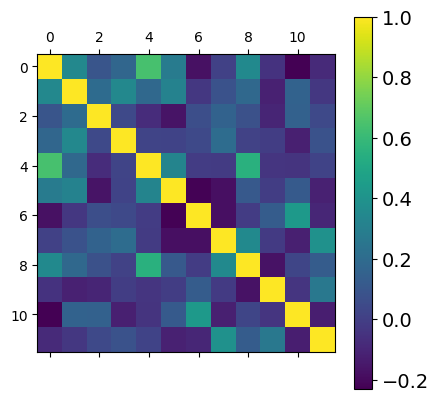

In [7]:
#input and output correlation plot
df = pd.concat((input, output), axis = 1)
print(df.shape)
plt.matshow(df.corr())
#plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
#plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

          0         1         2         3         4         5         6  \
0  1.000000  0.322261 -0.013841 -0.016235  0.551562 -0.039982 -0.045632   
1  0.322261  1.000000 -0.223794 -0.181803  0.114502 -0.009047  0.119034   
2 -0.013841 -0.223794  1.000000 -0.180297 -0.012855  0.126060  0.430538   
3 -0.016235 -0.181803 -0.180297  1.000000  0.354040 -0.023606 -0.122150   
4  0.551562  0.114502 -0.012855  0.354040  1.000000 -0.168374  0.026778   
5 -0.039982 -0.009047  0.126060 -0.023606 -0.168374  1.000000 -0.039459   
6 -0.045632  0.119034  0.430538 -0.122150  0.026778 -0.039459  1.000000   
7  0.018139 -0.117476 -0.099165  0.392709  0.125883  0.263432 -0.126328   

          7  
0  0.018139  
1 -0.117476  
2 -0.099165  
3  0.392709  
4  0.125883  
5  0.263432  
6 -0.126328  
7  1.000000  


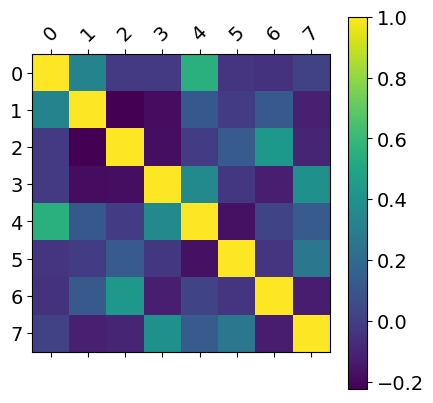

In [8]:
correlation = output.corr()
print(correlation)
plt.matshow(correlation)

plt.xticks(range(output.select_dtypes(['number']).shape[1]), output.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(output.select_dtypes(['number']).shape[1]), output.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

          0         1         2         3
0  1.000000  0.345936  0.091986  0.173454
1  0.345936  1.000000  0.200407  0.342032
2  0.091986  0.200407  1.000000  0.038550
3  0.173454  0.342032  0.038550  1.000000


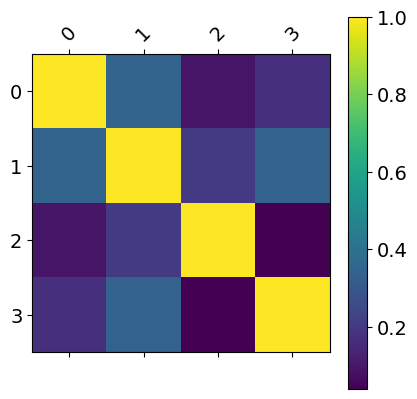

In [9]:
correlation = input.corr()
print(correlation)
plt.matshow(correlation)

plt.xticks(range(input.select_dtypes(['number']).shape[1]), input.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(input.select_dtypes(['number']).shape[1]), input.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [163]:
#converting input and output back into numpy arrays
input = input.to_numpy()
output = output.to_numpy()



In [164]:
#defining and fitting rcca model with 1 latent dimension and regularization coefficient of 0.2
latentDim = 1
mdl = czoo.rCCA(latent_dimensions = latentDim,  c=0.2)

# Fit model
mdl.fit( (input, output) )

# Extract parameters
r2 = np.square(mdl.average_pairwise_correlations( (input, output) ))

A, B = mdl.loadings_( (input, output) )
U, V = mdl.transform( (input, output) )


RMSE: 0.6508143727339024
R²: 0.4605113223130868


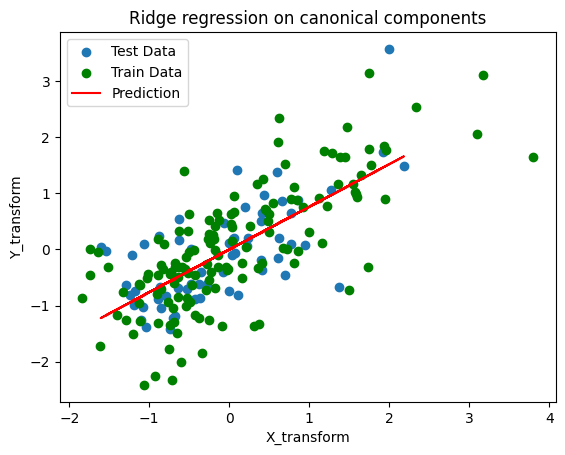

0.9751863961597818
0.06378128623762357
[[ 2.61972378e-01  1.48292952e-01 -8.54372581e-02 -2.31116747e-02
   1.50228949e-01 -1.65747990e-02 -9.61448239e-02 -3.79685645e-02]
 [ 2.74816702e-01  1.55563653e-01 -8.96261877e-02 -2.42448241e-02
   1.57594571e-01 -1.73874499e-02 -1.00858738e-01 -3.98301369e-02]
 [ 3.09093586e-01  1.74966539e-01 -1.00804935e-01 -2.72687925e-02
   1.77250766e-01 -1.95561230e-02 -1.13438480e-01 -4.47980045e-02]
 [ 1.80921809e-01  1.02413199e-01 -5.90041722e-02 -1.59612476e-02
   1.03750226e-01 -1.14467893e-02 -6.63989678e-02 -2.62216247e-02]
 [ 1.92445261e-01  1.08936202e-01 -6.27623247e-02 -1.69778673e-02
   1.10358388e-01 -1.21758696e-02 -7.06281170e-02 -2.78917586e-02]
 [ 9.84003001e-02  5.57007998e-02 -3.20913674e-02 -8.68105159e-03
   5.64279862e-02 -6.22571436e-03 -3.61132712e-02 -1.42614965e-02]
 [-5.42428957e-01 -3.07049132e-01  1.76902783e-01  4.78540589e-02
  -3.11057727e-01  3.43190798e-02  1.99073418e-01  7.86161084e-02]
 [ 4.97958536e-02  2.81876059e

In [166]:

lr = Ridge()
#Train-test split for linear regression
U_train, U_test, V_train, V_test = train_test_split(U, V, test_size = 0.3,random_state = 0)
X_train, X_test, Y_train, Y_test = train_test_split(input, output, test_size = 0.3,random_state = 0)
lr.fit(U_train, V_train)
V_pred = lr.predict(U_test)


#metrics: RMSE & R2 score
mse = mean_squared_error(V_test, V_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse) # indicates how far the predictions are from the actual values
r2 = r2_score(V_test, V_pred)
print("R²:", r2) #suggests that the model explains 36.6% of the variance in the target variable.

#Plot
plt.scatter(U_test, V_test, label = 'Test Data')
plt.scatter(U_train, V_train, color="green", label = 'Train Data' )
plt.plot(U_test, V_pred, color ="red", label ='Prediction')


#print(V_test.shape, V_pred.shape)


plt.xlabel("X_transform")
plt.ylabel("Y_transform")
plt.title("Ridge regression on canonical components")
plt.legend()
plt.show()
"""
#Convert V_hat back into Y
#B_inv = np.linalg.pinv(B)

#Predicting Back to Original Space

#Y_pred = np.dot(V_pred, np.transpose(B))
"""
#07/02 - diff way to predict Y-pred, results a somewhat smaller negative number??
B_inv = np.linalg.pinv(B)
Y_pred = np.dot(V_pred, B_inv)


#print(Y_pred)
#print(Y_test)
#r2 for Y
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))
print(r2_score(Y_test, Y_pred))



In [122]:
#Experimenting with wavelet transforms: possible next steps

input = pd.read_excel(base_dir+'\Project\wavedata_EEG_unfiltered.xlsx')
output = pd.read_excel(base_dir+'\Project\wavedata_EMG_unfiltered.xlsx')


In [123]:
input = input.to_numpy()
output = output.to_numpy()

In [124]:
end = 75
input = input[:, :end]
output = output[:, :end]

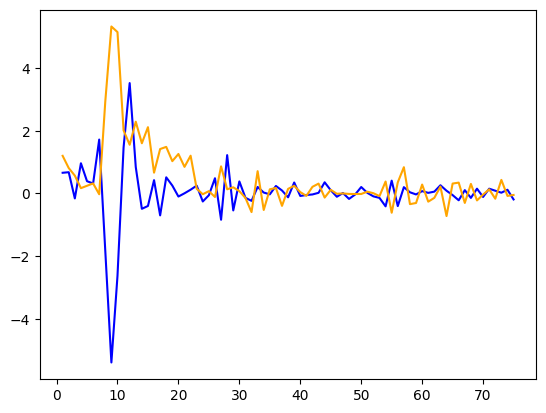

In [129]:
t = np.arange(1, end+1)
t1 = np.arange(1, end+1)

plt.plot(t, input[3], color = "blue")
plt.plot(t1, output[3], color = "orange")

[[ 2.54185058e-01  3.95251314e-01 -2.35565551e-01 ... -6.32493737e-02
   7.09267182e-02  9.46922380e-03]
 [ 4.14569969e-01  7.74826607e-02 -8.81969138e-01 ... -7.50085614e-02
  -5.19977343e-03  1.99255815e-02]
 [-1.53343119e-02 -6.40134503e-01 -1.44037353e+00 ... -1.25293067e-03
  -1.85106934e-02 -1.24205036e-02]
 ...
 [-1.96995280e-01 -2.82925236e-01 -2.29495167e-01 ...  4.04664723e-01
   2.91669876e-01  2.28875294e-01]
 [-1.97381173e-01 -3.00109533e-01 -1.37067696e-01 ... -6.06945294e-02
   3.63319492e-01  3.81540472e-01]
 [-2.14055171e-01 -3.26196672e-01 -1.80327143e-01 ...  2.80327488e-01
   9.22036526e-02  3.62820207e-01]] [0.2        0.1        0.06666667 0.05       0.04       0.03333333
 0.02857143 0.025      0.02222222 0.02       0.01818182 0.01666667
 0.01538462 0.01428571 0.01333333 0.0125     0.01176471 0.01111111
 0.01052632 0.01       0.00952381 0.00909091 0.00869565 0.00833333
 0.008      0.00769231 0.00740741 0.00714286 0.00689655 0.00666667
 0.00645161 0.00625    0.0060

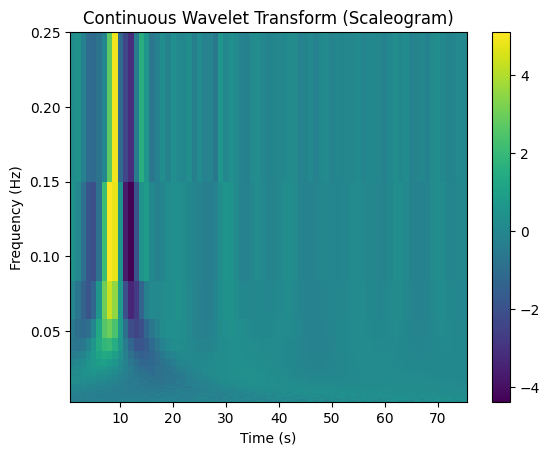

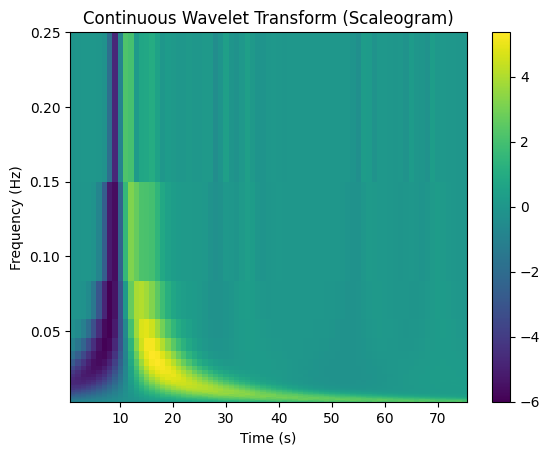

In [126]:
import matplotlib.pyplot as plt
import numpy as np

import pywt

#input
time, sst = t, input[60]
#dt = time[1] - time[0]


wavelet = 'gaus1'
scales = np.arange(1, end)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet)

print(cfs, frequencies)

fig, axs = plt.subplots(1, 1)
pcm = axs.pcolormesh(t, frequencies, cfs)
#[0].set_yscale("log")
axs.set_xlabel("Time (s)")
axs.set_ylabel("Frequency (Hz)")
axs.set_title("Continuous Wavelet Transform (Scaleogram)")
fig.colorbar(pcm, ax=axs)

#output
time, sst = t, output[60]
#dt = time[1] - time[0]


wavelet = 'gaus1'
scales = np.arange(1, end)

[cfs, frequencies] = pywt.cwt(sst, scales, wavelet)

print(cfs, frequencies.shape)

fig, axs = plt.subplots(1, 1)
pcm = axs.pcolormesh(t, frequencies, cfs)
#[0].set_yscale("log")
axs.set_xlabel("Time (s)")
axs.set_ylabel("Frequency (Hz)")
axs.set_title("Continuous Wavelet Transform (Scaleogram)")
fig.colorbar(pcm, ax=axs)

In [147]:
#preprocessing
output_cfs = np.zeros((end - 1, end, 107))
input_cfs = np.zeros((end-1, end, 107))
for i in range(107):
    time, sst = t, input[i]
    cfs, frequencies = pywt.cwt(sst, scales, wavelet)
    input_cfs[:, :, i] = cfs
    sst = output[i]
    cfs, frequencies = pywt.cwt(sst, scales, wavelet)
    output_cfs[:, :, i] = cfs

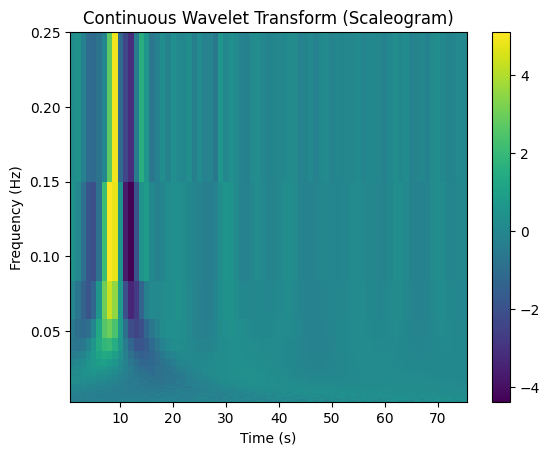

In [148]:
fig, axs = plt.subplots(1, 1)
pcm = axs.pcolormesh(t, frequencies, input_cfs[:, :, 60])
#[0].set_yscale("log")
axs.set_xlabel("Time (s)")
axs.set_ylabel("Frequency (Hz)")
axs.set_title("Continuous Wavelet Transform (Scaleogram)")
fig.colorbar(pcm, ax=axs)

In [149]:
print(input_cfs[1])

[[ 0.27084259  0.379098   -0.10934626 ... -0.08637812  0.24088033
  -0.17252292]
 [-0.24971045 -0.07593914 -0.14740966 ... -0.26717774 -0.27682382
  -0.55988274]
 [-1.11266877 -0.83355375 -0.26138133 ... -0.86341328 -0.97878047
  -0.91401935]
 ...
 [ 0.04356111 -0.10738689  0.09174716 ... -0.05619464  0.03461485
   0.05061942]
 [ 0.00866058 -0.12810714  0.00716014 ... -0.0690397   0.04687143
  -0.0313383 ]
 [-0.01138939 -0.04111182 -0.02916505 ... -0.03510406  0.02787992
  -0.08004358]]


In [151]:
inp = np.zeros((74*75, 107))
out = np.zeros((74*75, 107))
for i in range(107):
    inp[:, i] = (input_cfs[:, :, i]).flatten()
    out[:, i] = (output_cfs[:, :, i]).flatten()

inp = inp.T
out = out.T

In [154]:
print(inp.shape, out.shape)
print(inp, out)


(107, 5550) (107, 5550)
[[ 0.3219051   0.08154147 -0.43868612 ... -0.32064883  0.04304706
  -0.15139063]
 [ 0.34353857  0.30361511 -0.62086308 ... -0.6511762  -0.33050784
  -0.4471567 ]
 [-0.06884285  0.00823675 -0.08636592 ... -0.51810757 -0.33173224
  -0.53684265]
 ...
 [-0.10728218  0.2574338  -0.21846268 ... -0.00450651 -0.21126007
   0.06120291]
 [ 0.33024774  0.10245825 -0.66556519 ... -0.46313335 -0.31859376
  -0.28591439]
 [ 0.06378295 -0.14572663 -0.5382708  ... -0.49700107 -0.09992845
  -0.25473533]] [[-0.26167201 -0.19791848  0.12612152 ...  1.86664565  1.28346497
   1.8446662 ]
 [-0.32442252  0.02389264  0.07788274 ...  2.37348333  1.97234619
   2.35463115]
 [-0.83813365 -0.30283786  0.32244101 ...  3.29243291  3.54072714
   3.3648455 ]
 ...
 [-0.06316346 -0.0364123  -0.05057292 ...  1.26875456  1.22035207
   1.20752597]
 [-0.51025001 -0.02895277  0.32835207 ...  2.65053335  2.52636607
   2.6353481 ]
 [-0.52479501  0.18793253  0.38410666 ...  3.71990641  3.35640891
   3.473


KeyboardInterrupt



In [157]:
lr = Ridge()
#Train-test split for linear regression
#U_train, U_test, V_train, V_test = train_test_split(input_cfs, output_cfs, test_size = 0.3,random_state = 0)
X_train, X_test, Y_train, Y_test = train_test_split(inp, out, test_size = 0.3,random_state = 0)

lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)


#metrics: RMSE & R2 score
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse) # indicates how far the predictions are from the actual values
r2 = r2_score(Y_test, Y_pred)
print("R²:", r2) #suggests that the model explains 36.6% of the variance in the target variable.

"""
#Plot
plt.scatter(U_test, V_test, label = 'Test Data')
plt.scatter(U_train, V_train, color="green", label = 'Train Data' )
plt.plot(U_test, V_pred, color ="red", label ='Prediction')


#print(V_test.shape, V_pred.shape)


plt.xlabel("X_transform")
plt.ylabel("Y_transform")
plt.title("Ridge regression on canonical components")
plt.legend()
plt.show()
#Convert V_hat back into Y
#B_inv = np.linalg.pinv(B)

#Predicting Back to Original Space

#Y_pred = np.dot(V_pred, np.transpose(B))

#07/02 - diff way to predict Y-pred, results a somewhat smaller negative number??
B_inv = np.linalg.pinv(B)
Y_pred = np.dot(V_pred, B_inv)


#print(Y_pred)
#print(Y_test)
#r2 for Y
print(r2_score(Y_test, Y_pred))
print(Y_pred)
"""

RMSE: 1.4495508022653814
R²: -1.9705494733512299


'\n#Plot\nplt.scatter(U_test, V_test, label = \'Test Data\')\nplt.scatter(U_train, V_train, color="green", label = \'Train Data\' )\nplt.plot(U_test, V_pred, color ="red", label =\'Prediction\')\n\n\n#print(V_test.shape, V_pred.shape)\n\n\nplt.xlabel("X_transform")\nplt.ylabel("Y_transform")\nplt.title("Ridge regression on canonical components")\nplt.legend()\nplt.show()\n#Convert V_hat back into Y\n#B_inv = np.linalg.pinv(B)\n\n#Predicting Back to Original Space\n\n#Y_pred = np.dot(V_pred, np.transpose(B))\n\n#07/02 - diff way to predict Y-pred, results a somewhat smaller negative number??\nB_inv = np.linalg.pinv(B)\nY_pred = np.dot(V_pred, B_inv)\n\n\n#print(Y_pred)\n#print(Y_test)\n#r2 for Y\nprint(r2_score(Y_test, Y_pred))\nprint(Y_pred)\n'